In [12]:
import torch
words = open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
#creating a bigram
b = {}
for word in words:
  chs = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [35]:
sorted(b.items(),key=lambda kv: kv[1])
# the lamda function used here returns the index of the last element in the tuple

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [40]:
N = torch.zeros((27,27),dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
#at first the words are taken and in a set therefore removing
#duplicates and then converted to a list which is then sorted
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
#the enumerate function here takes the each charactors in the previous
#list and assigns a number to it
# stoi
itos = {o:p for p,o in stoi.items()}
#here 2 elements p and o is taken p is the charactor and o is the number that
#was assigned to it previously itos just prints that in reverse order
# itos

In [48]:
#changing the above for by using list
for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ich1 = stoi[ch1]
    ich2 = stoi[ch2]
    N[ich1,ich2] += 1
# N

(-0.5, 26.5, 26.5, -0.5)

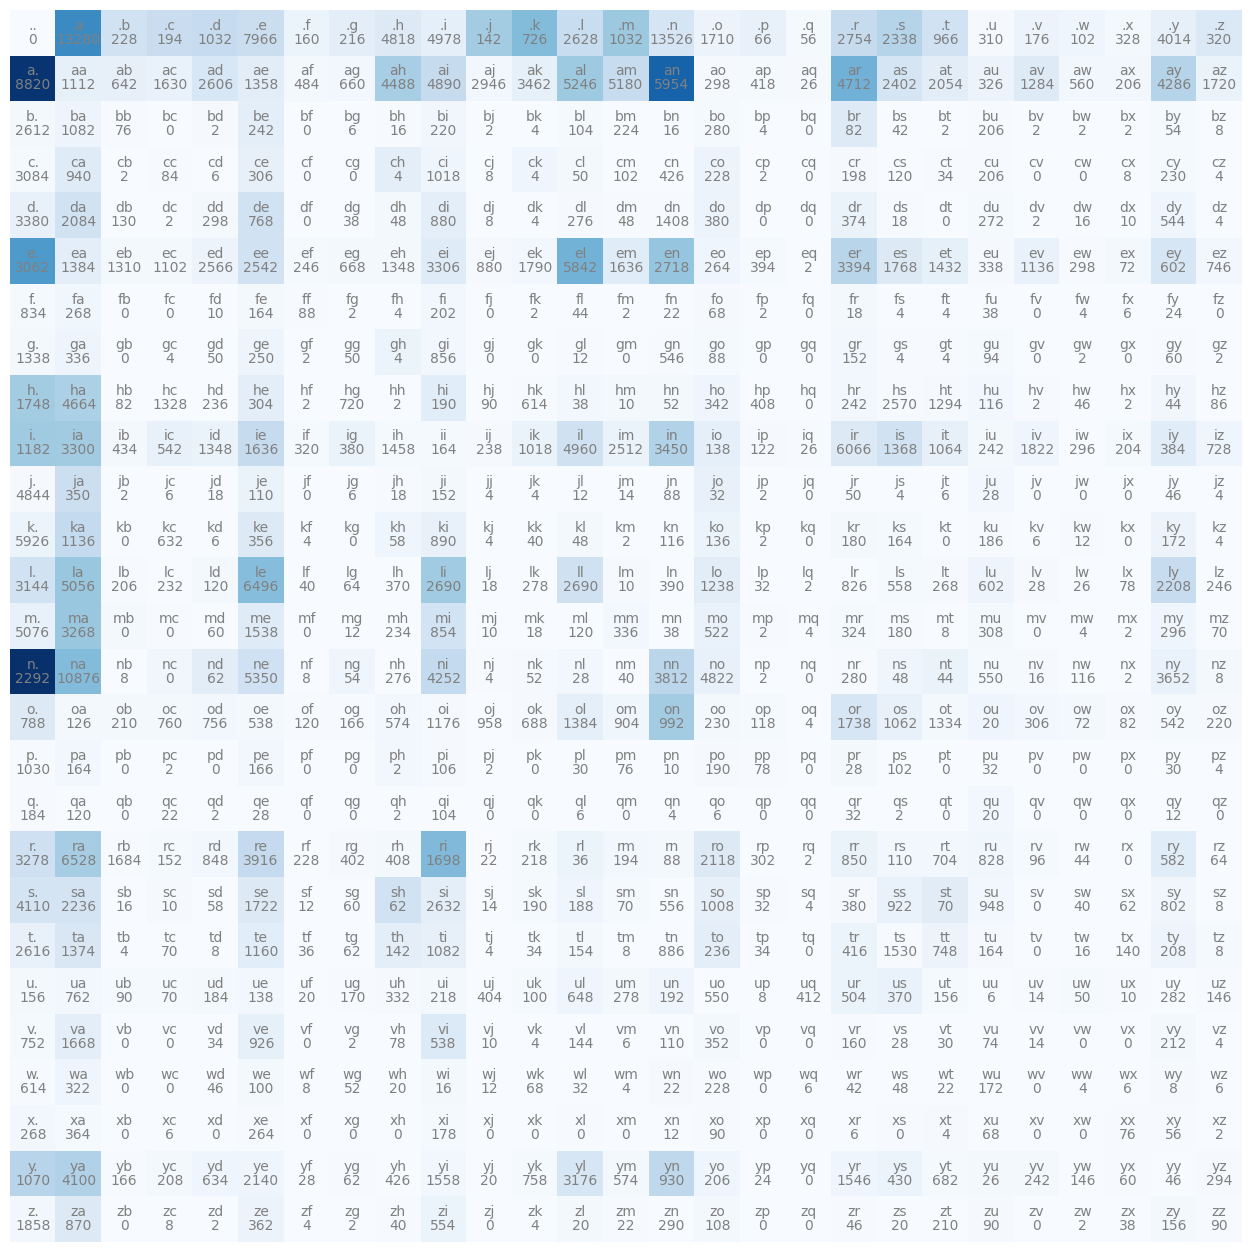

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(N)
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i]+itos[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i, N[j,i].item(), ha='center',va='top',color='gray')
plt.axis('off')